# **WhatsApp Chat Analysis**

Mainly This is the work of :-
* **Sentiment analysis** 
* **Keyword extraction** 
* **Named identity recognition** 
* **Text analysis**
* **Several other natural laguage programmming Tasks**

Now in this analysis our initial work will be to fetch the data from the whatsapp enviornment.So firstly we would like to takew a view of how to fetch the data:-
1. Choose the  **contact name**  or the  **Group name** on which you want the Analysis to be done 
2. Tap on the top right corner and click on  **More --> Export Chat** 
3. Then select without media for simplicity if it asks you whether you want your chats **with or without media**.
4. Then email this chat to yourself and download it to your system.

## Importing The Libraries

In [1]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections  import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

## Data Preprocessing

The data needs a lot of preprocessing which may also be both case and domain specific.Therefore a kind advice will be to go through the data once before the preprocessing and any further analysis.

This is a function mainly for time retrival ,finding Authors and fetching the datapoints. which is our main part in preprocessing for the analysis.


In [2]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

In [4]:
def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

In [5]:
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

## Data Retrival

In [6]:
data = []
conversation = '/home/sysadm/Desktop/Small Projects/Whats Chat Analysis/Data/WhatsApp Chat with 🖥️RKMVERI BDA 2020🤖.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [7]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())


            Date   Time           Author  \
39977 2021-06-17  11:38          Alimpan   
39978 2021-06-17  11:39        Pratik Da   
39979 2021-06-17  11:45  Nilotpal Sarkar   
39980 2021-06-17  11:45  Nilotpal Sarkar   
39981 2021-06-17  11:48          Alimpan   
39982 2021-06-17  11:48          Alimpan   
39983 2021-06-17  11:48  Sourjya Rkmveri   
39984 2021-06-17  11:48          Alimpan   
39985 2021-06-17  11:48  Sourjya Rkmveri   
39986 2021-06-17  11:48             Dasu   
39987 2021-06-17  11:48             Dasu   
39988 2021-06-17  11:52         Dibyendu   
39989 2021-06-17  11:52         Dibyendu   
39990 2021-06-17  11:52  Sourjya Rkmveri   
39991 2021-06-17  12:01  Sourjya Rkmveri   
39992 2021-06-17  12:08  Sourav Karmakar   
39993 2021-06-17  12:08  Sourav Karmakar   
39994 2021-06-17  12:12  Sourjya Rkmveri   
39995 2021-06-17  12:12  Sourjya Rkmveri   
39996 2021-06-17  12:14            Sawan   

                                                Message  
39977            

In [8]:
df

Date   Time           Author  \
0     2020-11-27  19:24           Aritra   
1     2020-11-27  19:24           Aritra   
2     2020-11-27  19:24             Asif   
3     2020-11-27  19:24             Asif   
4     2020-11-27  19:24           Aritra   
...          ...    ...              ...   
39992 2021-06-17  12:08  Sourav Karmakar   
39993 2021-06-17  12:08  Sourav Karmakar   
39994 2021-06-17  12:12  Sourjya Rkmveri   
39995 2021-06-17  12:12  Sourjya Rkmveri   
39996 2021-06-17  12:14            Sawan   

                                                Message  
0                                                  3 cb  
1                                   Gharami Neville fox  
2                                          Narayan ache  
3                                                    Lb  
4                                 May b left mid khelbe  
...                                                 ...  
39992                          Amader keo ber kore dilo  
39993                                              Cazz  
39994  swaty jdi mene ney.. course drop ta tahole valoe  
39995                 stty bara amr iccha nei ata korar  
39996         Korleo o r marks debena Ichha kore F debe  

[39997 rows x 4 columns]

In [9]:
total_messages = df.shape[0]
print(total_messages)

39997


In [10]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

2527


In [11]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

0


In [12]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)


print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
#print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)


Total Messages:  39997
Number of Media Shared:  2527
Number of Links Shared 386


In [13]:
names=df.iloc[:,2]
names=names.unique()
names=names.tolist()
names

['Aritra',
 'Asif',
 'Nilotpal Sarkar',
 'Dasu',
 'Dibyendu',
 'Saswata Da',
 None,
 'Nilab',
 'Sawan',
 '+91 70019 34929',
 'Pratik Da',
 'Sourav',
 'Dipan RKMVERI',
 'Sourjya Rkmveri',
 'Rohan Rkmveri',
 'Srijan',
 'Alimpan',
 'Roumya',
 'Sourav Karmakar',
 'Hiranmoy',
 '+91 89102 72978',
 'Oishik',
 'Debojyoti',
 'Deborshi',
 '+91 84367 30281']

In [14]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = names
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
for i in range(len(l)):
         
      # Filtering out messages of particular user
      req_df= messages_df[messages_df["Author"] == l[i]]
      l1.append(l[i])   
      # req_df will contain messages of only one particular user
      print(f'Stats of {l[i]} -')
      # shape will print number of rows which indirectly means the number of messages
      print('Messages Sent', req_df.shape[0])
      l2.append(req_df.shape[0])
      #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
      words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
      print('Average Words per message', words_per_message)
      l3.append(words_per_message)
      #media conists of media messages
      media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
      l4.append(media)
      print('Media Messages Sent', media)
      links = sum(req_df["urlcount"])   
      print('Links Sent', links)
      l5.append(links)  

Stats of Aritra -
Messages Sent 2611
Average Words per message 4.234392952891612
Media Messages Sent 166
Links Sent 0
Stats of Asif -
Messages Sent 213
Average Words per message 4.52112676056338
Media Messages Sent 15
Links Sent 0
Stats of Nilotpal Sarkar -
Messages Sent 1372
Average Words per message 4.175655976676385
Media Messages Sent 65
Links Sent 0
Stats of Dasu -
Messages Sent 3226
Average Words per message 4.4407935523868565
Media Messages Sent 212
Links Sent 9
Stats of Dibyendu -
Messages Sent 2335
Average Words per message 4.730620985010707
Media Messages Sent 389
Links Sent 1
Stats of Saswata Da -
Messages Sent 1335
Average Words per message 3.7737827715355805
Media Messages Sent 64
Links Sent 0
Stats of None -
Messages Sent 0
Average Words per message nan
Media Messages Sent 0
Links Sent 0
Stats of Nilab -
Messages Sent 2373
Average Words per message 4.770332911925832
Media Messages Sent 66
Links Sent 0
Stats of Sawan -
Messages Sent 4818
Average Words per message 5.8883354

<ipython-input-14-e5c866e14f76>:24: RuntimeWarning: invalid value encountered in long_scalars
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]


In [15]:
dic={"Author_Name":l1,"Number_of_Messages":l2,"Average_Words_per_message":l3,"Media_Messages_Sent":l4,"Links_Sent":l5}

In [16]:
whatsapp=pd.DataFrame(dic)
whatsapp

Author_Name  Number_of_Messages  Average_Words_per_message  \
0            Aritra                2611                   4.234393   
1              Asif                 213                   4.521127   
2   Nilotpal Sarkar                1372                   4.175656   
3              Dasu                3226                   4.440794   
4          Dibyendu                2335                   4.730621   
5        Saswata Da                1335                   3.773783   
6              None                   0                        NaN   
7             Nilab                2373                   4.770333   
8             Sawan                4818                   5.888335   
9   +91 70019 34929                  23                  13.695652   
10        Pratik Da                3164                   4.534766   
11           Sourav                 730                   5.136986   
12    Dipan RKMVERI                2587                   4.813684   
13  Sourjya Rkmveri                1222                   4.118658   
14    Rohan Rkmveri                 234                   7.564103   
15           Srijan                1192                   7.204698   
16          Alimpan                4657                   4.217093   
17           Roumya                 572                   6.770979   
18  Sourav Karmakar                 748                   4.783422   
19         Hiranmoy                 268                   5.022388   
20  +91 89102 72978                 121                   9.380165   
21           Oishik                 988                   4.142713   
22        Debojyoti                1305                   6.095019   
23         Deborshi                  22                   5.954545   
24  +91 84367 30281                 712                   9.737360   

    Media_Messages_Sent  Links_Sent  
0                   166           0  
1                    15           0  
2                    65           0  
3                   212           9  
4                   389           1  
5                    64           0  
6                     0           0  
7                    66           0  
8                   238          11  
9                     2           0  
10                  102           5  
11                   25           0  
12                  336           0  
13                   99           0  
14                    7           0  
15                   85           2  
16                  202           2  
17                   12           0  
18                  174           0  
19                   17           0  
20                    8           0  
21                   44           1  
22                   13           2  
23                    1           0  
24                  185           0

In [17]:
whatsapp=whatsapp.dropna()

In [18]:
whatsapp[whatsapp.Number_of_Messages == whatsapp.Number_of_Messages.max()].	Author_Name

8    Sawan
Name: Author_Name, dtype: object

In [19]:
whatsapp[whatsapp.Average_Words_per_message == whatsapp.Average_Words_per_message.max()].Author_Name

9    +91 70019 34929
Name: Author_Name, dtype: object

In [20]:
whatsapp[whatsapp.Media_Messages_Sent == whatsapp.Media_Messages_Sent.max()].Author_Name

4    Dibyendu
Name: Author_Name, dtype: object

In [21]:
whatsapp[whatsapp.Links_Sent == whatsapp.Links_Sent.max()].Author_Name

8    Sawan
Name: Author_Name, dtype: object

There are 1048480 words in all the messages.


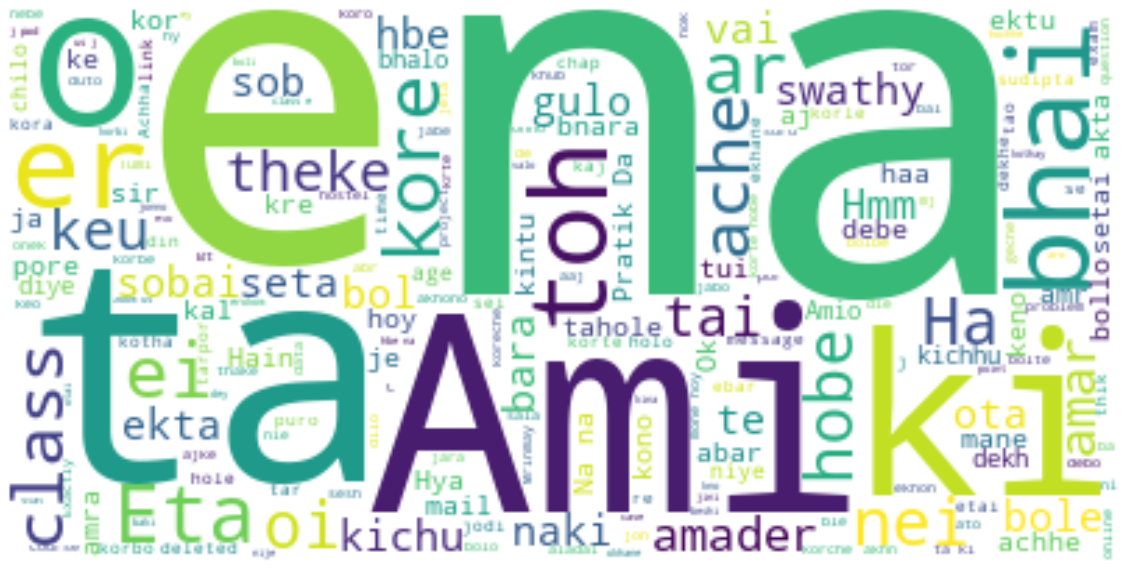

In [22]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
names1 = []
for val in names:
    if val != None :
        names1.append(val)
  

Author name Aritra


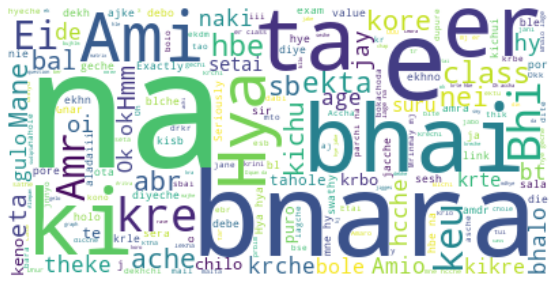

Author name Asif


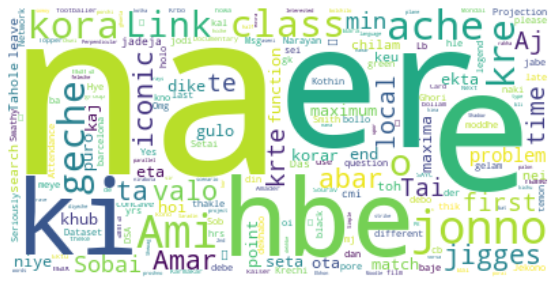

Author name Nilotpal Sarkar


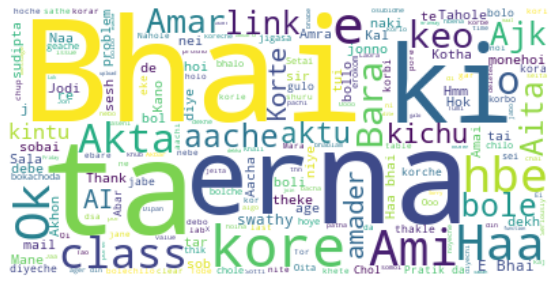

Author name Dasu


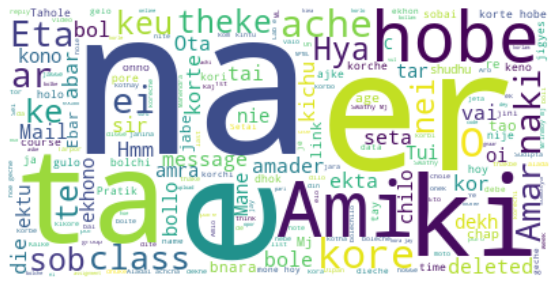

Author name Dibyendu


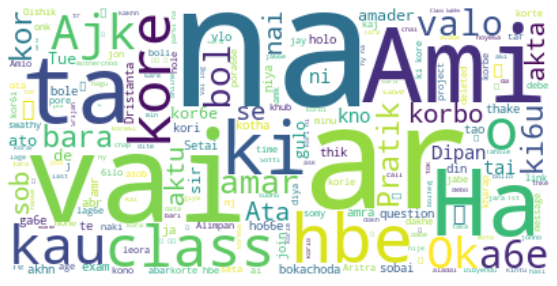

Author name Saswata Da


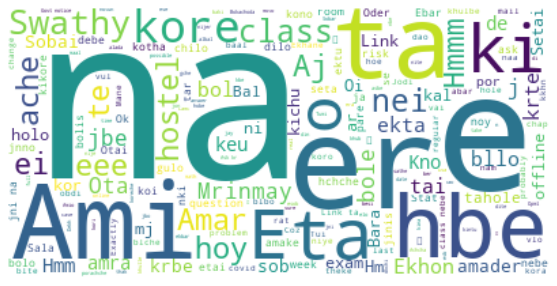

Author name Nilab


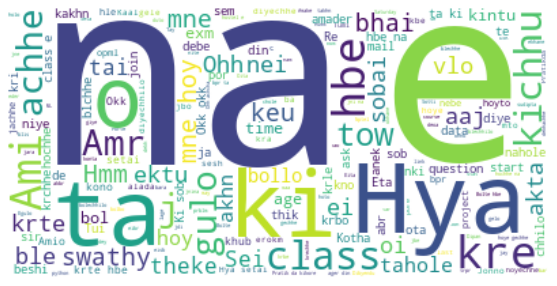

Author name Sawan


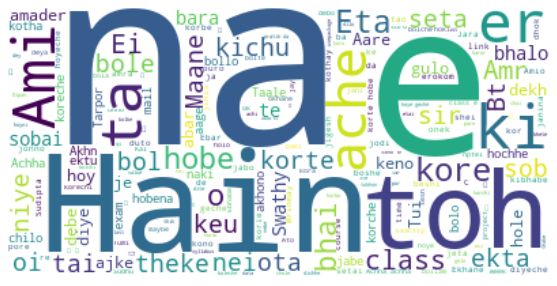

Author name +91 70019 34929


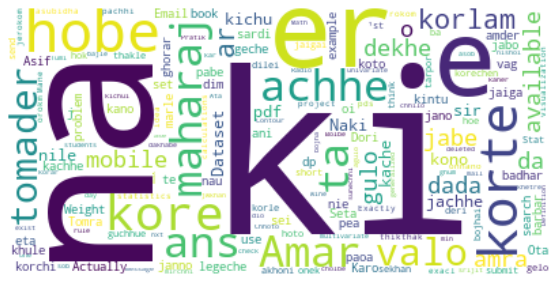

Author name Pratik Da


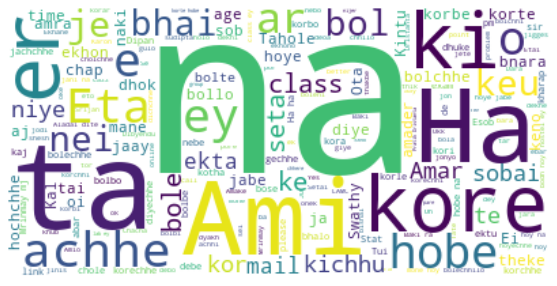

Author name Sourav


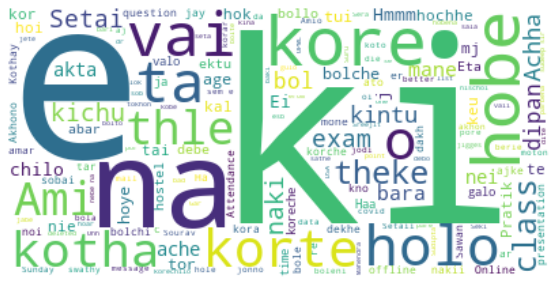

Author name Dipan RKMVERI


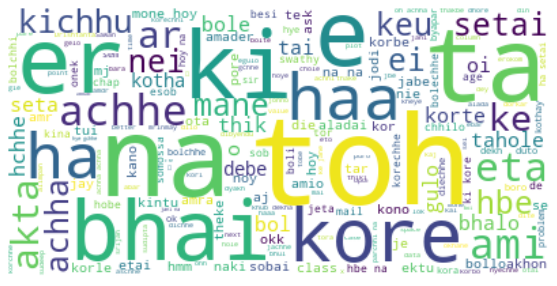

Author name Sourjya Rkmveri


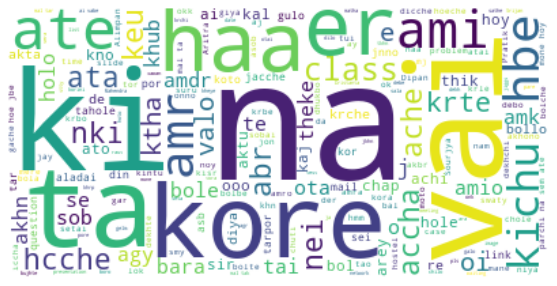

Author name Rohan Rkmveri


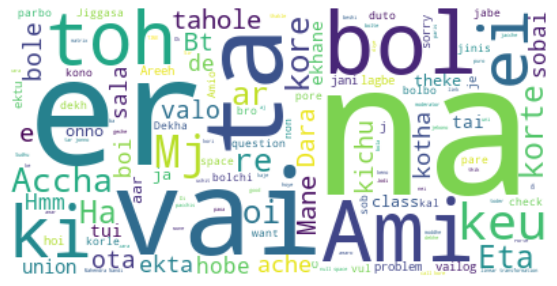

Author name Srijan


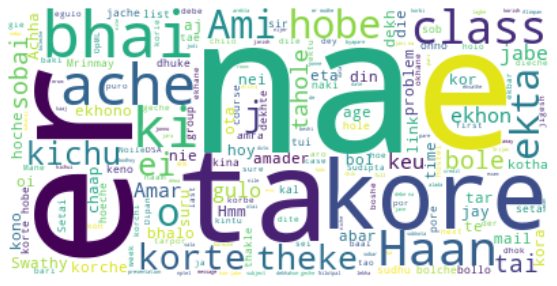

Author name Alimpan


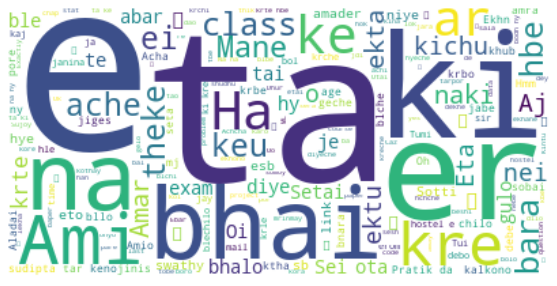

Author name Roumya


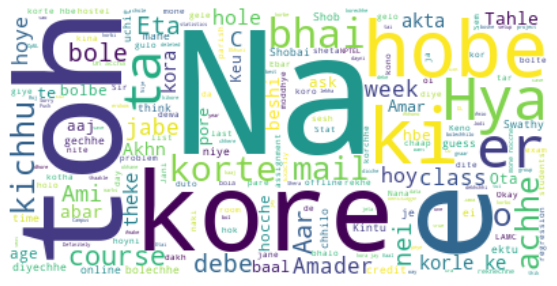

Author name Sourav Karmakar


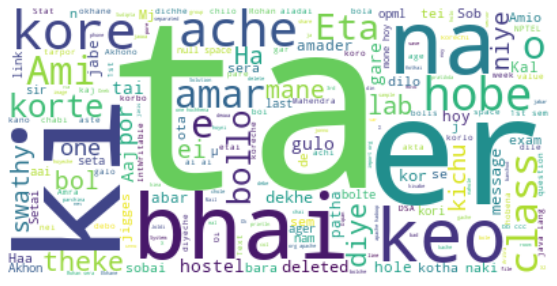

Author name Hiranmoy


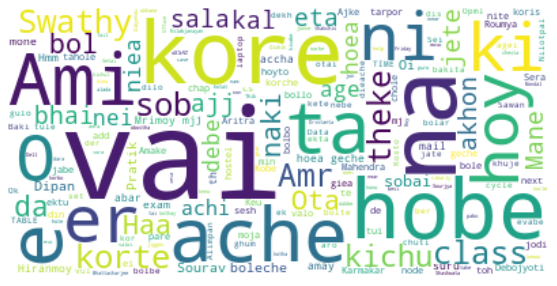

Author name +91 89102 72978


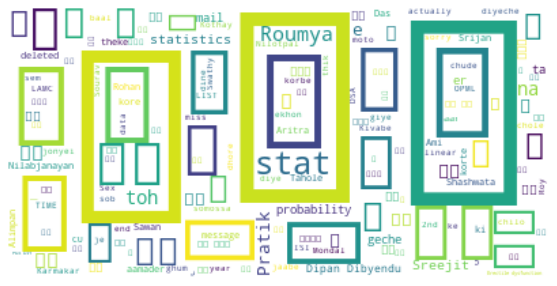

Author name Oishik


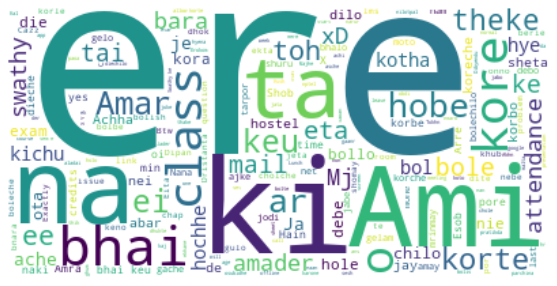

Author name Debojyoti


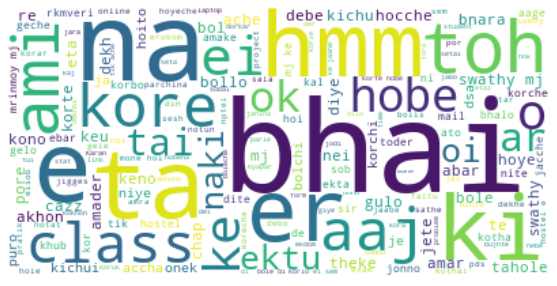

Author name Deborshi


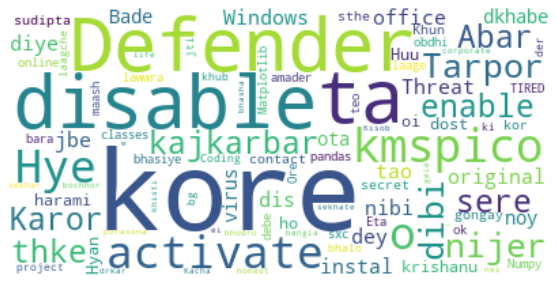

Author name +91 84367 30281


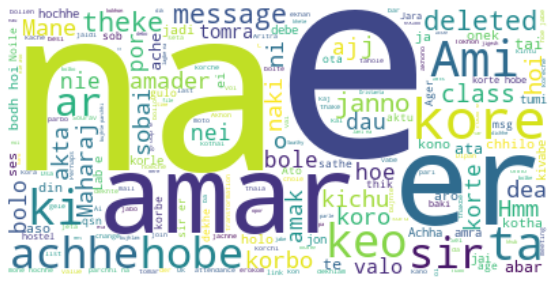

In [24]:
l = names1
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
